# Analysis of clinical variatns of ORC1 protein

In [71]:
from clinvar_functions import *
import pandas as pd
import matplotlib.pyplot as plt
import re

# Set option to display all rows
pd.set_option('display.max_rows', None)

## ORC1 regions

In [2]:
# List of intervals for particular feature

#LLPS = [(360, 382), (412, 476), (577, 636), (677, 729), (757, 816)] # Chinees paper
#IDR_total = [(183, 476)] # Chinees paper
#G4_RNA = [(413, 511)] # Hoshina paper
#CDCD6=[(180, 240)] # CDC6 paper
#BP=[(354, 368), (378, 392)] # CDC6 paper
IDR = [(183, 511)]
RBD = [(413, 511)]

# Positions
IDR_pos = generate_list(IDR)
RBD_pos = generate_list(RBD)
# G4_RNA_positions = generate_list(G4_RNA)
# LLPS_positions = generate_list(LLPS)
# CDCD6_positions = generate_list(CDCD6)
# BP_positions = generate_list(BP)

## Read data

In [3]:
# Set option to display all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

df = pd.read_csv('clinvar_result.csv', sep = "\t")
df = df[df['Gene(s)'] == 'ORC1'] # save only ORC1 gene - delete 7 records
df.shape

(333, 25)

In [4]:
df.columns

Index(['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession',
       'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome',
       'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID',
       'Canonical SPDI', 'Variant type', 'Molecular consequence',
       'Germline classification', 'Germline date last evaluated',
       'Germline review status', 'Somatic clinical impact',
       'Somatic clinical impact date last evaluated',
       'Somatic clinical impact review status', 'Oncogenicity classification',
       'Oncogenicity date last evaluated', 'Oncogenicity review status',
       'Unnamed: 24'],
      dtype='object')

In [11]:
# Keep only protein changes
df = df.dropna(subset=["Protein change"])

## Look at the different columns of df

In [ ]:
df["Condition(s)"].value_counts()

In [ ]:
df["Germline classification"].value_counts()

In [ ]:
df['Germline review status'].value_counts()

## Get list of transcript IDs

In [5]:
IDs = df['Name'].apply(lambda x: x.split(":")[0])
IDs.value_counts()

Name
NM_004153.4(ORC1)       332
NM_001190818.1(ORC1)      1
Name: count, dtype: int64

## Add new column: Condition_new

In [6]:
df['Condition_new'] = df['Condition(s)'].map(rename_condition, na_action='ignore')

In [7]:
df['Condition_new'].value_counts()

Condition_new
not provided                        211
Meier-Gorlin syndrome 1 probably     42
Meier-Gorlin syndrome 1              30
Inborn genetic diseases              30
Inborn genetic diseases probably     12
ORC1-related disorder probably        6
Name: count, dtype: int64

# Visualisation

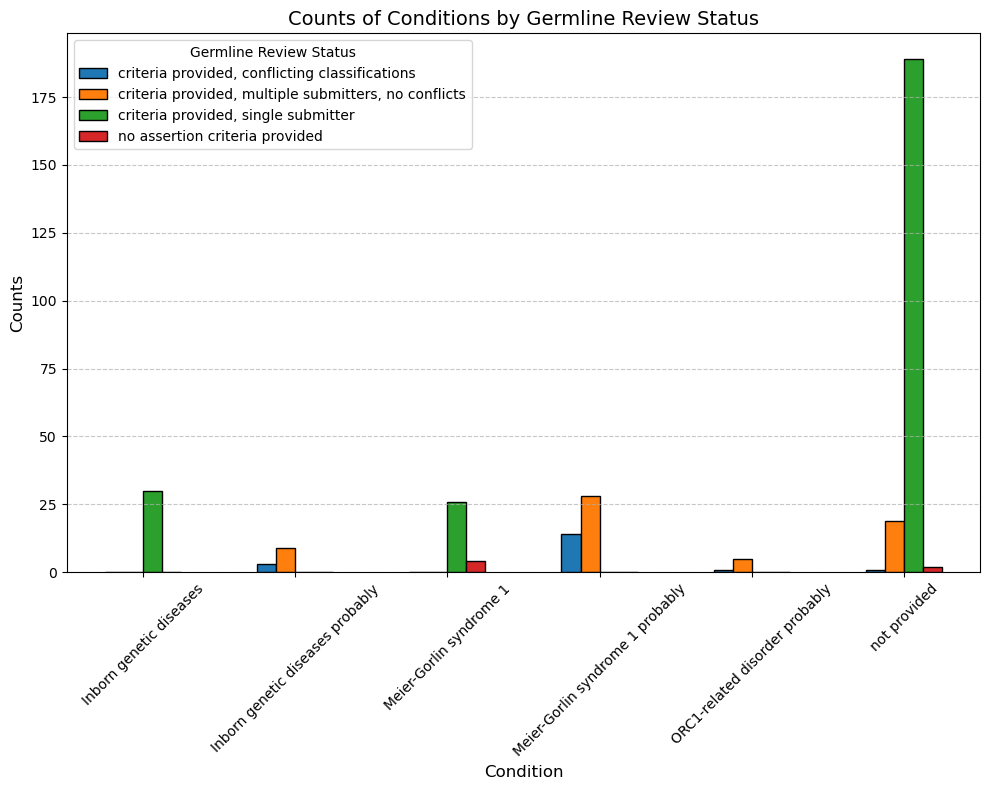

In [30]:
# Data
grouped_counts = df.groupby("Germline review status")["Condition_new"].value_counts()
plot_data = grouped_counts.reset_index(name="Counts")
plot_data

# Pivot the data for better visualization
pivot_data = plot_data.pivot(index="Condition_new", columns="Germline review status", values="Counts")

# Plot as a bar chart
pivot_data.plot(kind="bar", figsize=(10, 8), edgecolor="black")

plt.title("Counts of Conditions by Germline Review Status", fontsize=14)
plt.xlabel("Condition", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Germline Review Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

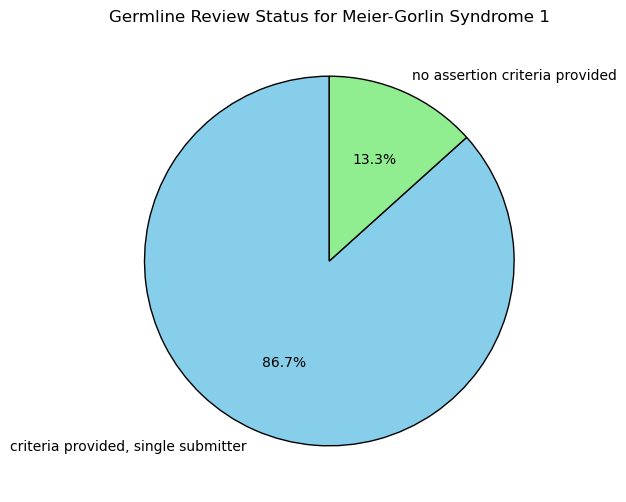

In [37]:
# Filter the data for the specific condition
filtered_data = df['Germline review status'][df["Condition_new"] =="Meier-Gorlin syndrome 1"]
# Count the occurrences of each status
status_counts = filtered_data.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
status_counts.plot.pie(
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Rotate start angle
    colors=['skyblue', 'lightgreen', 'orange'],  # Optional: specify colors
    wedgeprops={'edgecolor': 'black'},  # Add edge color
    title="Germline Review Status for Meier-Gorlin Syndrome 1"
)

plt.ylabel("")  # Remove default y-axis label
plt.show()

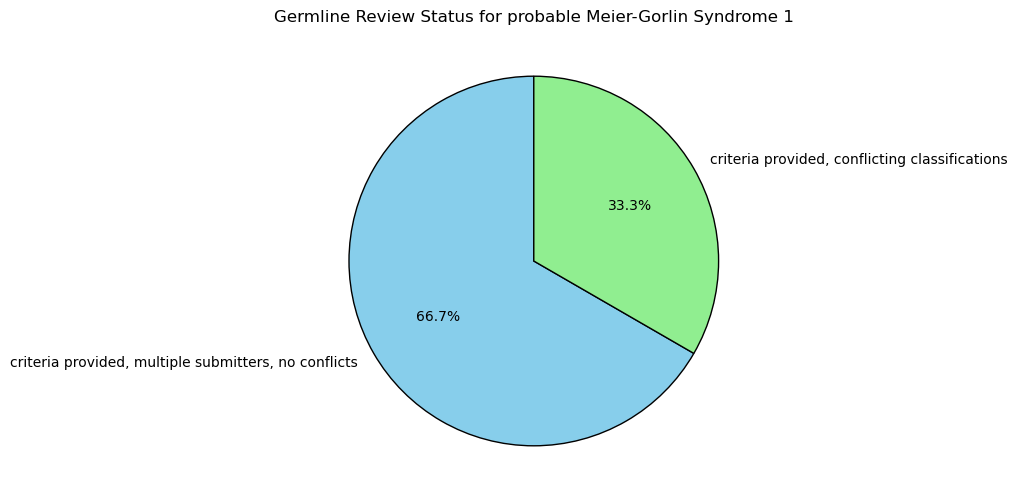

In [39]:
# Filter the data for the specific condition
filtered_data = df['Germline review status'][df["Condition_new"] =="Meier-Gorlin syndrome 1 probably"]
# Count the occurrences of each status
status_counts = filtered_data.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
status_counts.plot.pie(
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Rotate start angle
    colors=['skyblue', 'lightgreen', 'orange'],  # Optional: specify colors
    wedgeprops={'edgecolor': 'black'},  # Add edge color
    title="Germline Review Status for probable Meier-Gorlin Syndrome 1"
)

plt.ylabel("")  # Remove default y-axis label
plt.show()

# Filtration: Meier-Gorlin syndrome 1

In [64]:
filtered_df = df[
    (df["Condition_new"] == "Meier-Gorlin syndrome 1") &
    (df["Germline review status"] == "criteria provided, single submitter")
]
filtered_df.shape

(26, 26)

In [76]:
# List of prtein mutations
mutations = list(filtered_df["Protein change"].dropna())

# Split each string into separate mutations and flatten the list
mutations_names = [mutation.strip() for group in mutations for mutation in group.split(',')]

# Create a list of dictionaries with position and label
mutations_with_labels = [
    {"position": int(re.findall(r'\d+', mutation)[0]), "label": mutation}
    for mutation in mutations_names
]

# Print the result
print(mutations_with_labels)

[{'position': 846, 'label': 'R846W'}, {'position': 841, 'label': 'R841W'}, {'position': 807, 'label': 'P807L'}, {'position': 812, 'label': 'P812L'}, {'position': 802, 'label': 'H802Y'}, {'position': 797, 'label': 'H797Y'}, {'position': 655, 'label': 'T655I'}, {'position': 650, 'label': 'T650I'}, {'position': 617, 'label': 'L617P'}, {'position': 622, 'label': 'L622P'}, {'position': 523, 'label': 'G523R'}, {'position': 528, 'label': 'G528R'}, {'position': 380, 'label': 'R380L'}, {'position': 342, 'label': 'G342V'}, {'position': 312, 'label': 'P312S'}, {'position': 304, 'label': 'T304I'}, {'position': 270, 'label': 'E270K'}, {'position': 230, 'label': 'T230fs'}, {'position': 179, 'label': 'P179T'}, {'position': 155, 'label': 'F155S'}, {'position': 131, 'label': 'G131V'}, {'position': 105, 'label': 'R105W'}, {'position': 80, 'label': 'P80fs'}, {'position': 73, 'label': 'E73K'}]


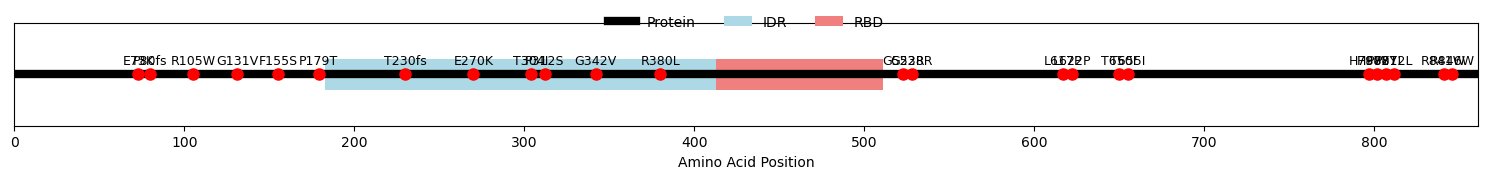

In [77]:
# Define protein information
protein_length = 861  # Example: protein is 800 amino acids long
domains = [
    {"name": "IDR", "start": 183, "end": 413, "color": "lightblue"},
    {"name": "RBD", "start": 413, "end": 511, "color": "lightcoral"},
]
mutations = mutations_with_labels

# Create the figure
fig, ax = plt.subplots(figsize=(15, 2))

# Draw the protein backbone
ax.plot([0, protein_length], [0.5, 0.5], color="black", lw=6, label="Protein")

# Draw the domains
for domain in domains:
    ax.barh(0.5, domain["end"] - domain["start"], left=domain["start"], height=0.3, color=domain["color"], label=domain["name"])

# Mark the mutations
for mutation in mutations:
    ax.plot(mutation["position"], 0.5, marker="o", color="red", markersize=8)
    ax.text(mutation["position"], 0.6, mutation["label"], ha="center", fontsize=9)

# Add labels and legend
ax.set_xlim(0, protein_length)
ax.set_ylim(0, 1)
ax.set_yticks([])
ax.set_xlabel("Amino Acid Position")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()

## Subsets

In [ ]:
criterion = 'criteria provided, conflicting classifications'
disease = 'Meier-Gorlin syndrome 1'
protein_mut = df['Protein change'][(df['Germline review status'] == criterion) & (df['Condition_new']==disease)]
yes, no = mutation_analysis(protein_mut, RBD_pos)  

In [ ]:
no

## Amino acids analysis

Analyse the percantage of Arginine (R) in different domains of ORC1 protein

In [ ]:
# Protein sequences
IDR = "AAKCQKPVRAKSKSAESPSWTPAEHVAKRIESRHSASKSRQTPTHPLTPRARKRLELGNLGNPQMSQQTSCASLDSPGRIKRKVAFSEITSPSKRSQPDKLQTLSPALKAPEKTRETGLSYTEDDKKASPEHRIILRTRIAASKTIDIREERTLTPISGGQRSSVVPSVILKPENIKKRDAKEAKAQNEATSTPHRIRRKSSVLTMNRIRQQLRFLGNSKSDQEEKEILPAAEISDSSSDEEEASTPPLPRRAPRTVSRNLRSSLKSSLHTLTKVPKKSLKPRTPRCAAPQIRS"
G4 = "AAEISDSSSDEEEASTPPLPRRAPRTVSRNLRSSLKSSLHTLTKVPKKSLKPRTPRCAAPQIRSRSLAAQEPASVLEEARLRLHVSAVPESLPCREQEF"
CDC6 = "QESAAKCQKPVRAKSKSAESPSWTPAEHVAKRIESRHSASKSRQTPTHPLTPRARKRLELG"
ORC="MAHYPTRLKTRKTYSWVGRPLLDRKLHYQTYREMCVKTEGCSTEIHIQIGQFVLIEGDDDENPYVAKLLELFEDDSDPPPKKRARVQWFVRFCEVPACKRHLLGRKPGAQEIFWYDYPACDSNINAETIIGLVRVIPLAPKDVVPTNLKNEKTLFVKLSWNEKKFRPLSSELFAELNKPQESAAKCQKPVRAKSKSAESPSWTPAEHVAKRIESRHSASKSRQTPTHPLTPRARKRLELGNLGNPQMSQQTSCASLDSPGRIKRKVAFSEITSPSKRSQPDKLQTLSPALKAPEKTRETGLSYTEDDKKASPEHRIILRTRIAASKTIDIREERTLTPISGGQRSSVVPSVILKPENIKKRDAKEAKAQNEATSTPHRIRRKSSVLTMNRIRQQLRFLGNSKSDQEEKEILPAAEISDSSSDEEEASTPPLPRRAPRTVSRNLRSSLKSSLHTLTKVPKKSLKPRTPRCAAPQIRSRSLAAQEPASVLEEARLRLHVSAVPESLPCREQEFQDIYNFVESKLLDHTGGCMYISGVPGTGKTATVHEVIRCLQQAAQANDVPPFQYIEVNGMKLTEPHQVYVQILQKLTGQKATANHAAELLAKQFCTRGSPQETTVLLVDELDLLWTHKQDIMYNLFDWPTHKEARLVVLAIANTMDLPERIMMNRVSSRLGLTRMCFQPYTYSQLQQILRSRLKHLKAFEDDAIQLVARKVAALSGDARRCLDICRRATEICEFSQQKPDSPGLVTIAHSMEAVDEMFSSSYITAIKNSSVLEQSFLRAILAEFRRSGLEEATFQQIYSQHVALCRMEGLPYPTMSETMAVCSHLGSCRLLLVEPSRNDLLLRVRLNVSQDDVLYALKDE"

# Calculations
ORC1_R = percantage_aa(seq=ORC, A="R")
IDR_R = percantage_aa(seq=IDR, A="R")
G4_R = percantage_aa(seq=G4, A="R")
CDC6_R = percantage_aa(seq=CDC6, A="R")

ORC1_G = percantage_aa(seq=ORC, A="G")
IDR_G = percantage_aa(seq=IDR, A="G")
G4_G = percantage_aa(seq=G4, A="G")
CDC6_G = percantage_aa(seq=CDC6, A="G")

print(f"Arginines in different ORC1 domains:")
print(f"ORC1: {ORC1_R} ; IDR: {IDR_R} ; G4 binding: {G4_R} ; CDC6 binding: {CDC6_R}")

print(f"Glycines in different ORC1 domains:")
print(f"ORC1: {ORC1_G} ; IDR: {IDR_G} ; G4 binding: {G4_G} ; CDC6 binding: {CDC6_G}")